In [33]:
import keras
from keras.models import Model
from keras.datasets import cifar100
from keras.layers import Input ,Dense,Activation,Flatten,Dropout
from keras.layers.convolutional import  Conv2D
from keras.layers.pooling import MaxPooling2D
from keras import optimizers

In [34]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

the shape of the training data is : (50000, 32, 32, 3) (50000, 1)
the shape of the texing data is : (10000, 32, 32, 3) (10000, 1)
the range of features is : 0 to 255
the range of laybals is : 0 to 99
lab 1 is [19]
lab 2 is [29]
lab 3 is [0]
lab 4 is [11]
lab 5 is [1]
lab 6 is [86]
lab 7 is [90]
lab 8 is [28]
lab 9 is [23]
lab 10 is [31]


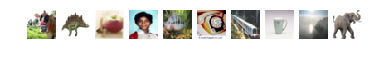

In [35]:
print('the shape of the training data is :',x_train.shape,y_train.shape )
print('the shape of the texing data is :',x_test.shape,y_test.shape )

import numpy as np
print('the range of features is :' ,np.min(x_train),'to',np.max(x_train))
print('the range of laybals is :' ,np.min(y_train),'to',np.max(y_train))

import matplotlib.pyplot as plt 
% matplotlib inline 
for i in range (10):
    image = x_train[i]
    plt.subplot(2,10,i+1)
    print('lab',i+1,'is',y_train[i])
    plt.imshow(image, cmap='Greys')#显示灰度图
    plt.axis('off')


In [36]:
x_train=x_train/255.0
y_train=y_train/255.0

y_train = keras.utils.to_categorical(y_train[:,0], num_classes=100)
y_test = keras.utils.to_categorical(y_test[:,0], num_classes=100)


In [37]:
def ConvNet(num_classes=100):

    images = Input(shape=(32, 32, 3))           #use input shape that matches image size
    
    # Convolutional layers
    x = Conv2D(filters=12, kernel_size=(4, 4), padding='same', activation='softmax')(images)  #conv layer1
    x = Dropout(0.25)(x)                     #dropout layer1
    
    x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)   #conv layer2
    x = MaxPooling2D(pool_size=(3, 3))(x)  #pooling layer2
    x = Dropout(0.5)(x)                     #dropout layer1
    
    x = Conv2D(filters=64, kernel_size=(2, 2), activation='relu')(x)   #conv layer2
    x = MaxPooling2D(pool_size=(2, 2))(x)  #pooling layer2
    x = Dropout(0.15)(x)

    # Fully-connected layer: 
    x = Flatten()(x)          
    x = Dense(200)(x)         #200 neurons fc layer
    x = Dense(units=num_classes, activation='softmax')(x)

    # Instantiate a model based on inputs/outputs
    model = Model(inputs=images, outputs=x)

    # Configure the model for training. 
    model.compile(
            loss='categorical_crossentropy',
            optimizer=optimizers.Adam(),
            metrics=[
                'categorical_accuracy',
                keras.metrics.top_k_categorical_accuracy])

    return model

In [ ]:
model = ConvNet()
model.fit(
        x=x_train,
        y=y_train,
        epochs=30,
        shuffle=True)

Epoch 1/30
50000/50000 [==============================] - 250s 5ms/step - loss: 0.0073 - categorical_accuracy: 0.9994 - top_k_categorical_accuracy: 0.9994
Epoch 2/30
50000/50000 [==============================] - 241s 5ms/step - loss: 1.1921e-07 - categorical_accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000
Epoch 3/30
50000/50000 [==============================] - 244s 5ms/step - loss: 1.1921e-07 - categorical_accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000
Epoch 4/30
12416/50000 [======>.......................] - ETA: 3:15 - loss: 1.1921e-07 - categorical_accuracy: 1.0000 - top_k_categorical_accuracy: 1.0000